In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
model_4 = Sequential()
model_4.add(Dense(400, activation="relu", input_shape=(784,)))
model_4.add(Dropout(0.4))
model_4.add(Dense(300, activation="relu"))
model_4.add(Dropout(0.4))
model_4.add(Dense(10, activation="softmax"))

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
learning_rate = 0.003
model_4.compile(
    loss="categorical_crossentropy",
    optimizer=RMSprop(learning_rate=learning_rate),
    metrics=["accuracy"],
)

In [4]:
batch_size = 128
epochs = 20

history_4 = model_4.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test),
)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.8373 - loss: 0.5199 - val_accuracy: 0.9545 - val_loss: 0.1538
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9482 - loss: 0.1790 - val_accuracy: 0.9677 - val_loss: 0.1154
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9595 - loss: 0.1459 - val_accuracy: 0.9722 - val_loss: 0.1034
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9642 - loss: 0.1305 - val_accuracy: 0.9751 - val_loss: 0.0967
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9690 - loss: 0.1183 - val_accuracy: 0.9780 - val_loss: 0.0803
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9684 - loss: 0.1158 - val_accuracy: 0.9745 - val_loss: 0.1019
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9717 - loss: 0.1103 - val_accuracy: 0.9775 - val_loss: 0.0875
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9739 - loss: 0.0982 - val_acc

In [5]:
model_4.summary()
score = model_4.evaluate(x_test, y_test, verbose=0)
print("Model 4 - Test loss:", score[0])
print("Model 4 - Test accuracy:", score[1])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 400)                 │         314,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 300)                 │         120,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 300)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           3,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 874,622 (3.34 MB)

 Trainable params: 437,310 (1.67 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 437,312 (1.67 MB)

Model 4 - Test loss: 0.11090222001075745
Model 4 - Test accuracy: 0.9800000190734863


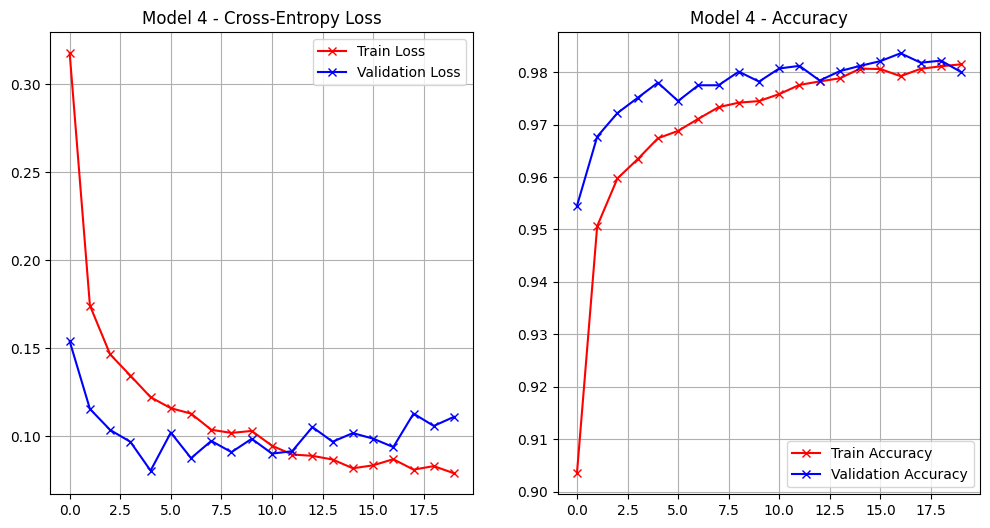

In [6]:
def plot_loss_accuracy(history, model_name="Model"):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"], "r-x", label="Train Loss")
    ax.plot(history.history["val_loss"], "b-x", label="Validation Loss")
    ax.legend()
    ax.set_title(f"{model_name} - Cross-Entropy Loss")
    ax.grid(True)
    ax = fig.add_subplot(1, 2, 2)
    acc_key = "accuracy" if "accuracy" in history.history else "acc"
    val_acc_key = "val_accuracy" if "val_accuracy" in history.history else "val_acc"

    ax.plot(history.history[acc_key], "r-x", label="Train Accuracy")
    ax.plot(history.history[val_acc_key], "b-x", label="Validation Accuracy")
    ax.legend()
    ax.set_title(f"{model_name} - Accuracy")
    ax.grid(True)
plot_loss_accuracy(history_4, model_name="Model 4")


In [7]:
model_5 = Sequential()
model_5.add(Dense(400, activation="relu", input_shape=(784,)))
model_5.add(Dropout(0.4))
model_5.add(Dense(300, activation="relu"))
model_5.add(Dropout(0.4))
model_5.add(Dense(10, activation="softmax"))

In [8]:
model_5.compile(
    loss="categorical_crossentropy",
    optimizer=RMSprop(learning_rate=learning_rate),
    metrics=["accuracy"],
)

In [12]:
epochs = 30
history_5 = model_5.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test),
    
)

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9753 - loss: 0.0994 - val_accuracy: 0.9794 - val_loss: 0.0964
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9778 - loss: 0.0930 - val_accuracy: 0.9796 - val_loss: 0.0904
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9770 - loss: 0.0911 - val_accuracy: 0.9803 - val_loss: 0.0879
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9776 - loss: 0.0865 - val_accuracy: 0.9810 - val_loss: 0.0937
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9796 - loss: 0.0840 - val_accuracy: 0.9799 - val_loss: 0.0942
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9789 - loss: 0.0855 - val_accuracy: 0.9793 - val_loss: 0.1057
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9803 - loss: 0.0826 - val_accuracy: 0.9800 - val_loss: 0.1105
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.9801 - loss: 0.0825 - val_ac

In [13]:
model_5.summary()
score = model_5.evaluate(x_test, y_test, verbose=0)
print("Model 5 - Test loss:", score[0])
print("Model 5 - Test accuracy:", score[1])


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 400)                 │         314,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 300)                 │         120,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 300)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           3,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 874,622 (3.34 MB)

 Trainable params: 437,310 (1.67 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 437,312 (1.67 MB)

Model 5 - Test loss: 0.13225889205932617
Model 5 - Test accuracy: 0.982699990272522


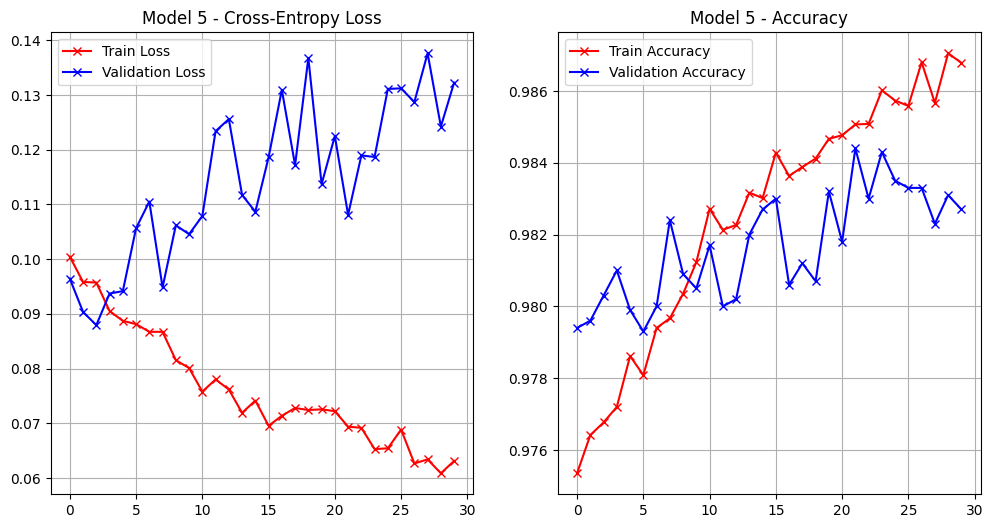

In [14]:
plot_loss_accuracy(history_5, model_name="Model 5")